# Label Encoder
- Importing libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base
from sklearn.preprocessing import LabelEncoder

# Read the data

In [185]:
def Read_data(Train_Data):
     return Train_Data.columns.tolist()

def Show_data(Train_Data):
     return Train_Data.head()

Train_Data = pd.read_csv(r"C:\personal\Sklearn_And_Python_For_Interview\Data_Files\train.csv")
print(Read_data(Train_Data))

['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target']


In [186]:
Sample_data = Show_data(Train_Data)
Sample_data

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


# Select Target Columns

In [187]:
def Select_Target(Sample_data):
     X = Sample_data.drop(['target'], axis=1)
     y = Sample_data['target']
     return X, y

X,  y = Select_Target(Sample_data)

X

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [188]:
y

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

# Find the Distribution of Target variable

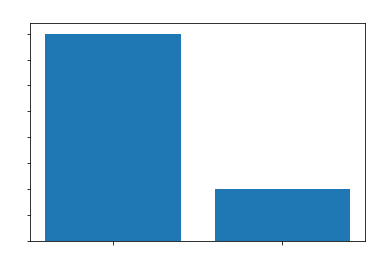

In [189]:
def Count_Plot(y):
     x = y.value_counts()
     plt.bar(x.index, x)
     plt.gca().set_xticks([0,1])
     plt.title("Distribution of target variable",  fontsize=14, color = 'white')
     plt.xticks(color = 'white')
     plt.yticks(color = 'white')
     plt.show()
     
Count_Plot(y)


# Label Encoder on X Input Variable

# Apply Logistic Regression

In [190]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to encode categorical columns in a DataFrame
def encode_categorical_columns(X):
    train = pd.DataFrame()
    label = LabelEncoder()
    
    for col in X.columns:
        if X[col].dtype == 'object': 
            train[col] = label.fit_transform(X[col])
        else:
            train[col] = X[col]  
    
    return train


# Function to apply logistic regression on the data
def logistic_regression(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    
    return lr  

train_encoded = encode_categorical_columns(X)  
logistic_regression(train_encoded, y)          


Accuracy: 1.0


LogisticRegression()

In [191]:
# from sklearn.preprocessing import OneHotEncoder
# def One_Hot_Encoder(X):
#      encoder = OneHotEncoder()
#      train =  encoder.fit_transform(X)
#      return train

# def Logistic(X,y):
#      y = y.values.ravel()
#      X_train, y_train, X_test, y_test = train_test_split(X, y ,  test_size = 0.2, random_state = 42)
#      Lr = LogisticRegression()
#      Lr.fit(X_train, y_train)
#      Y_pred =  Lr.predict(X_test)
#      print("accuracy :", accuracy_score(y_test, Y_pred))
#      return Lr

# Train_One_Hot = One_Hot_Encoder(X)
# Logistic(Train_One_Hot, y)

In [192]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function for One-Hot Encoding
def One_Hot_Encoder(X):
    encoder = OneHotEncoder()
    train = encoder.fit_transform(X).toarray() 
    return train

# Function for Logistic Regression
def Logistic(X, y):
    # Ensure y is a 1D array
    y = y.values.ravel()  # Use ravel() to make sure y is 1D if it's from a dataframe
    
    # Split the data correctly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the logistic regression model
    Lr = LogisticRegression()
    Lr.fit(X_train, y_train)
    
    # Predict on the test set
    Y_pred = Lr.predict(X_test)
    
    # Print the accuracy
    print("Accuracy:", accuracy_score(y_test, Y_pred))
    
    return Lr

Train_One_Hot = One_Hot_Encoder(X) 
Logistic(Train_One_Hot, y)          


Accuracy: 1.0


LogisticRegression()